# XOR and perceptrons

## Single perceptron

A single perceptron cannot realise an XOR gate.

## Hidden layer

A hidden layer with a sigmoid activation can realise an XOR gate. This requires a hidden layer with two neurons, each of which is connected to the output layer.

float64
(1000, 2)
float64
(1000, 1)
Epoch 1/50


/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5100 - loss: 0.7085
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 0.7020
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5080 - loss: 0.6999
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.6991
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5090 - loss: 0.6977
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6966
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6960
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6953
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5110 - loss: 0.6949
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5150 - loss: 0.6941
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5210 - loss: 0.6940
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.6943

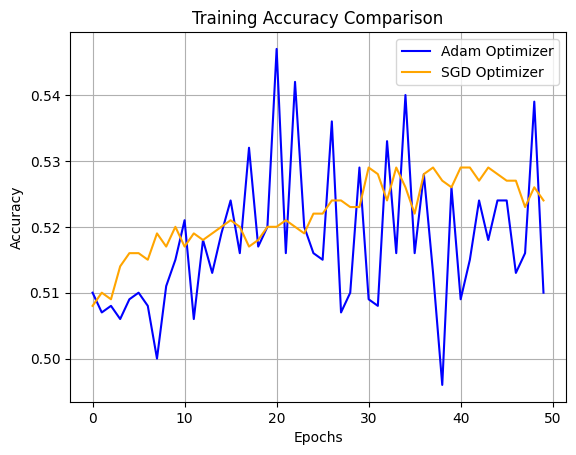

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

#CUDA_VISIBLE_DEVICES: "-1"

Adam_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,))])
Adam_model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
SGD_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,))])
SGD_model.compile(optimizer=SGD(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X = np.random.rand(num_samples, 2)
print(X.dtype)
print(X.shape)
y = np.random.randint(0, 2, size=(num_samples, 1)).astype(np.float64)
print(y.dtype)
print(y.shape)
# Train both models
Adam_history = Adam_model.fit(X, y, epochs=50, batch_size=32, verbose=1)
SGD_history = SGD_model.fit(X, y, epochs=50, batch_size=32, verbose=0)
# Plot training accuracy
plt.plot(Adam_history.history['accuracy'], label='Adam Optimizer', color='blue')
plt.plot(SGD_history.history['accuracy'], label='SGD Optimizer', color='orange')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

